#Spreadsheet Dataset

## Iris Dataset

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the neural network
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))  # 1st hidden layer with 10 neurons, input dimension of 4 (features)
model.add(Dense(5, activation='relu'))  # 2nd hidden layer with 5 neurons
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons (output classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
24/24 [==============================] - 2s 22ms/step - loss: 1.4861 - accuracy: 0.0000e+00 - val_loss: 1.2287 - val_accuracy: 0.0333
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 1.1715 - accuracy: 0.0750 - val_loss: 1.1582 - val_accuracy: 0.3000
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 1.1409 - accuracy: 0.3417 - val_loss: 1.1414 - val_accuracy: 0.3000
Epoch 4/100
24/24 [==============================] - 0s 11ms/step - loss: 1.1183 - accuracy: 0.3250 - val_loss: 1.1180 - val_accuracy: 0.2667
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 1.1011 - accuracy: 0.3000 - val_loss: 1.0994 - val_accuracy: 0.1000
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 1.0920 - accuracy: 0.1250 - val_loss: 1.0845 - val_accuracy: 0.1000
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 1.0779 - accuracy: 0.2833 - val_loss: 1.0805 - val_accuracy: 0.3000
Epoch 

# Image Dataset

##Minst

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


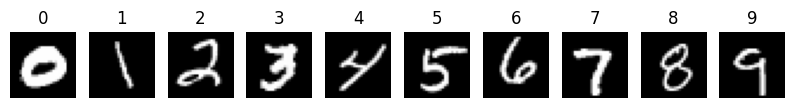

In [ ]:
# Visualize a sample image for each label
num_classes = 10
samples_per_class = 1
plt.figure(figsize=(10, 5))
for y in range(num_classes):
    idxs = np.flatnonzero(np.argmax(y_train, axis=1) == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(y))
plt.show()

In [ ]:
t# Create the neural network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 10s 20ms/step - loss: 0.2273 - accuracy: 0.9333 - val_loss: 0.1079 - val_accuracy: 0.9652
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0834 - accuracy: 0.9744 - val_loss: 0.0802 - val_accuracy: 0.9738
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0835 - val_accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0640 - val_accuracy: 0.9792
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0609 - accuracy: 0.9815
Loss: 0.060877300798892975, Accuracy: 0.9815000295639038
